In [ ]:
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn import utils
from google.colab.patches import cv2_imshow
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

##Download Dataset From Kaggle

In [ ]:
#Mount your GDrive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.upload()

#Upload kaggle.json (Kaggle API Token)
#You can download it by create new API Token from your kaggle account

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"paskalishenry","key":"26d7f93b5b7565321eda90e82b859281"}'}

In [ ]:
#Make sure kaggle.json file is present
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Jun  3 15:07 kaggle.json


In [ ]:
#Install kaggle API client
!pip install -q kaggle

In [ ]:
#Download and unzip the dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download sriramr/fruits-fresh-and-rotten-for-classification


100% 3.58G/3.58G [00:45<00:00, 94.3MB/s]
100% 3.58G/3.58G [00:45<00:00, 83.6MB/s]


In [ ]:
!unzip fruits-fresh-and-rotten-for-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.21 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.31 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07

##MODEL

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)            

In [ ]:
training_dir="/content/dataset/train"
train_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(training_dir,
                                                    target_size=(100,100),
                                                    batch_size=32,
                                                    class_mode='categorical')
testing_dir = "/content/dataset/test"
validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

validation_generator = validation_datagen.flow_from_directory(testing_dir,
                                                              target_size=(100,100),
                                                         batch_size=32,
                                                         class_mode='categorical')

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [ ]:
history = model.fit(train_generator, epochs=15, verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
341/341 [==============================] - 361s 1s/step - loss: 0.5629 - acc: 0.7924 - val_loss: 0.2694 - val_acc: 0.9099
Epoch 2/15
341/341 [==============================] - 355s 1s/step - loss: 0.2720 - acc: 0.9011 - val_loss: 0.2241 - val_acc: 0.9192
Epoch 3/15
341/341 [==============================] - 351s 1s/step - loss: 0.1670 - acc: 0.9410 - val_loss: 0.1561 - val_acc: 0.9477
Epoch 4/15
341/341 [==============================] - 357s 1s/step - loss: 0.1222 - acc: 0.9567 - val_loss: 0.1894 - val_acc: 0.9259
Epoch 5/15
341/341 [==============================] - 351s 1s/step - loss: 0.1183 - acc: 0.9592 - val_loss: 0.0963 - val_acc: 0.9652
Epoch 6/15
341/341 [==============================] - 353s 1s/step - loss: 0.0931 - acc: 0.9677 - val_loss: 0.1365 - val_acc: 0.9518
Epoch 7/15
341/341 [==============================] - 345s 1s/step - loss: 0.0699 - acc: 0.9742 - val_loss: 0.0850 - val_acc: 0.9715
Epoch 8/15
341/341 [==============================] - 345s 1s/step - 

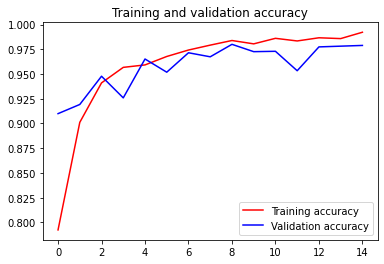

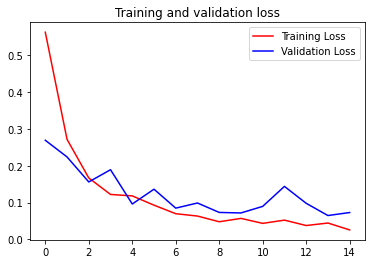

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
export_dir = '/content/dr/MyDrive/rotten/saved_model/1'

# YOUR CODE HERE
tf.saved_model.save(model, export_dir)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /content/dr/MyDrive/rotten/saved_model/1/assets


In [ ]:
from google.colab import drive
drive.mount('/content/dr')

Mounted at /content/dr


In [ ]:
model = load_model('/content/drive/MyDrive/rotten/saved_model/1', compile = True)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)            

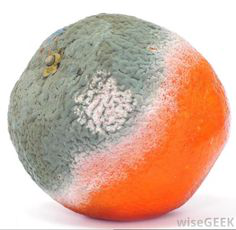

Rotten Orange


In [ ]:
from PIL import Image
import numpy as np
from skimage import transform
#from IPython.display import Image 
def load(filename):
   np_image = Image.open(filename)
   display(np_image)
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (100, 100, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load('/content/rottenorange.jpg')
result = model.predict(image)
classes = np.argmax(result, axis = 1)
if classes[0]==0:
    print("Apple")
elif classes[0]==1:
    print("Banana")
elif classes[0]==2:
    print("Orange")
elif classes[0]==3:
    print("Rotten Apple")
elif classes[0]==4:
    print("Rotten Banana")
else:
    print("Rotten Orange")
#print(result)
#print(classes)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
